<a href="https://colab.research.google.com/github/loaiwalid07/main/blob/main/Template_matching_and_the_multilayer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 style=' border:1;'><center>Template matching and the multilayer perceptron</center></h1>

----
- By : ***Loai Nazeer***
----

**Load important Packages we will need**

In [ ]:
import pandas as pd
import numpy as np
import math
import time
import os
from os import listdir
from matplotlib import image
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from skimage.filters import median
from sklearn.decomposition import PCA
from skimage import exposure

# Load the Dataset
### We will be using the Kyl-berg Texture Dataset v. 1.0 by Dr. Gustaf Kylberg
**The original database contains 28 texture classes and is available at https://www.cb.uu.se/~gustaf/texture/.**

In [ ]:
# insert the files name of the dataset
train_dic="textures/training/"
test_dic="textures/testing/"
list_files = ['canvas1', 'cushion1', 'linsseeds1', 'sand1', 'seat2' ,'stone1']
list_files

['canvas1', 'cushion1', 'linsseeds1', 'sand1', 'seat2', 'stone1']

# **Getting Started**

In [ ]:
# Load the images as array and save them in a list

def load_file (file):
    image_list = []
    y=[]
    filenames=os.listdir(file)
    for filename in filenames:
        img_data = io.imread(file+'/'+filename) 
        # Here we load each image and we can convert it to grayscale with 
        # make "as.gray=True" but we will use rgb2gray function
        image_list.append(img_data)
        print('> loaded %s | %s' % (filename, img_data.shape))
        y.append(filename[:filename.index("-")])
    return image_list,y

In [ ]:
#Load training dataset in list
x,y=[],[]
for i in range(len(list_files)):
    x+=(load_file(train_dic+list_files[i])[0])
    y+=(load_file(train_dic+list_files[i])[1])

> loaded canvas1-a-p001.png | (576, 576)
> loaded canvas1-a-p002.png | (576, 576)
> loaded canvas1-a-p003.png | (576, 576)
> loaded canvas1-a-p004.png | (576, 576)
> loaded canvas1-a-p005.png | (576, 576)
> loaded canvas1-a-p006.png | (576, 576)
> loaded canvas1-a-p007.png | (576, 576)
> loaded canvas1-a-p008.png | (576, 576)
> loaded canvas1-a-p009.png | (576, 576)
> loaded canvas1-a-p010.png | (576, 576)
> loaded canvas1-a-p011.png | (576, 576)
> loaded canvas1-a-p012.png | (576, 576)
> loaded canvas1-a-p013.png | (576, 576)
> loaded canvas1-a-p014.png | (576, 576)
> loaded canvas1-a-p015.png | (576, 576)
> loaded canvas1-a-p016.png | (576, 576)
> loaded canvas1-a-p017.png | (576, 576)
> loaded canvas1-a-p018.png | (576, 576)
> loaded canvas1-a-p019.png | (576, 576)
> loaded canvas1-a-p020.png | (576, 576)
> loaded canvas1-a-p021.png | (576, 576)
> loaded canvas1-a-p022.png | (576, 576)
> loaded canvas1-a-p023.png | (576, 576)
> loaded canvas1-a-p024.png | (576, 576)
> loaded canvas1

> loaded sand1-a-p002.png | (576, 576)
> loaded sand1-a-p003.png | (576, 576)
> loaded sand1-a-p004.png | (576, 576)
> loaded sand1-a-p005.png | (576, 576)
> loaded sand1-a-p006.png | (576, 576)
> loaded sand1-a-p007.png | (576, 576)
> loaded sand1-a-p008.png | (576, 576)
> loaded sand1-a-p009.png | (576, 576)
> loaded sand1-a-p010.png | (576, 576)
> loaded sand1-a-p011.png | (576, 576)
> loaded sand1-a-p012.png | (576, 576)
> loaded sand1-a-p013.png | (576, 576)
> loaded sand1-a-p014.png | (576, 576)
> loaded sand1-a-p015.png | (576, 576)
> loaded sand1-a-p016.png | (576, 576)
> loaded sand1-a-p017.png | (576, 576)
> loaded sand1-a-p018.png | (576, 576)
> loaded sand1-a-p019.png | (576, 576)
> loaded sand1-a-p020.png | (576, 576)
> loaded sand1-a-p021.png | (576, 576)
> loaded sand1-a-p022.png | (576, 576)
> loaded sand1-a-p023.png | (576, 576)
> loaded sand1-a-p024.png | (576, 576)
> loaded sand1-a-p025.png | (576, 576)
> loaded sand1-a-p026.png | (576, 576)
> loaded sand1-a-p027.png

(576, 576)

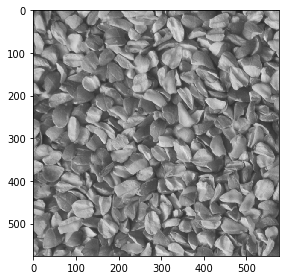

In [ ]:
io.imshow(x[70])
x[70].shape

 # **Image Preprocessing**

In [ ]:
#convert images to grayscale

def gray_scale(image_list):
    img_gray_list = []
    for i in image_list:
        conv=rgb2gray(i)
        img_gray_list.append(conv)
    #print(img_gray_list)
    return img_gray_list

In [ ]:
x=gray_scale(x)

<ipython-input-6-1716b78a7575>:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  conv=rgb2gray(i)


In [ ]:
# Resize the images

def resize_data(img_gray_list,hight,width):
    final_data=[]
    for i in img_gray_list:
        final_data.append(resize(i, (hight,width)))
    return final_data

In [ ]:
x = resize_data(x,32,32)

(32, 32)

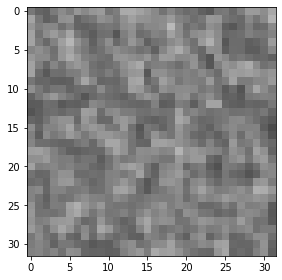

In [ ]:
io.imshow(x[70])
x[70].shape

In [ ]:
x=np.array(x)
x.shape

(180, 32, 32)

In [ ]:
#save the datasets as array and reshape them
ns_1, nx_1, ny_1 = np.array(x).shape
x_reshaped=np.array(x).reshape((ns_1,nx_1*ny_1))

In [ ]:
#Split the dataset to train and validtion by => 70 / 30

X_train_1 , X_val_1 , y_train_1, y_val_1 = train_test_split(x_reshaped , y , test_size=0.30, random_state=42)
X_train_1.shape,X_val_1.shape

((126, 1024), (54, 1024))

In [ ]:
print("-Length of Trian Dataset => ",len(X_train_1),"and the length of validation dataset ->",len(X_val_1))

-Length of Trian Dataset =>  126 and the length of validation dataset -> 54


# Image Matching

In [ ]:
#cross-correlation function

def cc (imageA,imageB):
    dotproduct=0
    for a,b in zip(imageA,imageB):
        dotproduct += a*b
    #print('Cross-Correlation of two images -> :', dotproduct)
    return dotproduct

#convolution function

def conv (imageA,imageB):
    dotproduct=0
    for a,b in zip(imageA,imageB[::-1]):
        dotproduct += a*b
    #print('Convolution of two images -> :', dotproduct)
    return dotproduct

#sum of squared differences function

def ssd(imageA, imageB):
# the 'Sum Squared Error' between the two images is the
# sum of the squared difference between the two images;
# NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    #print('SSD of two images -> :', err)
    return err

#Normalizton
def norm(image):
    nor_a=[]

    for a in image:
        nor_a.append((a - np.min(image)) / (np.max(image)-np.min(image)))
    return np.array(nor_a)

# matching and simple classifier function

def matchingImages(imageA, imageB, method='cc', normalize=False):

    if method=='cc' and normalize==True:
        out = cc(norm(imageA),norm(imageB))
        if out > 225:
            clas="Same"
        else:
            clas="Diff"
    elif method=='cc' and normalize==False:
        out = cc(imageA,imageB)
        if out > 250:
            clas="Same"
        else:
            clas="Diff"
    elif method=='conv' and normalize==True:
        out = conv(norm(imageA), norm(imageB))
        if out > 225:
            clas="Same"
        else:
            clas="Diff"
    elif method=='conv' and normalize==False:
        out = conv(imageA,imageB)  
        if out > 250:
            clas="Same"
        else:
            clas="Diff"
    elif method=='ssd' and normalize==True:
        out = ssd(norm(imageA), norm(imageB))
        if out<=7:
            clas="Same"
        else:
            clas="Diff"    
    elif method=='ssd' and normalize==False:
        out = ssd(imageA,imageB) 
        if out<=55:
            clas="Same"
        else:
            clas="Diff"
            
    print("Out: %.2f" % (out))
    return out,clas

In [ ]:
# this is function to make a labels for binary classifier
def pair_label(y):
    label=[]
    for j in range(len(y)):
        for i in range(j,len(y)-1):
            if y[j]==y[i+1]:
                label.append("Same")
            else:
                label.append("Diff")
    return label

In [ ]:
# we will run each method to find the threshold for similar class
l=[]
for j in range(len(X_train_1)):
    for i in range(j,len(X_train_1)-1):
        if y_train_1[j]==y_train_1[i+1]:
            l.append(cc(X_train_1[j], X_train_1[i+1]))
th=(sum(l)/len(l))
print("Number of samples with same class ->",len(l))
print("The average value for threshold ->",th)

Number of samples with same class -> 1263
The average value for threshold -> 250.02066180922526


- We will repeat this previous cell with changing the method we use to find the thresholds
- From run each method with training dataset and calculate the score with similar class,Then we take the average of these values

    - 'cc',False ->  250.01029295328584
    - 'cc',True -> 225.24386381631038
    - 'conv',True -> 224.02929532858275
    - 'conv',False ->  249.95486935866984
    - 'ssd',False ->   7.640538400633413
    - 'ssd',True ->  55.7403008709422

- Now we will predict after we select the thresholds

In [ ]:
pred=[]
for j in range(len(X_train_1)):
    for i in range(j,len(X_train_1)-1):
        res,cls=matchingImages(X_train_1[j], X_train_1[i+1])
        pred.append(cls)

Out: 250.02
Out: 249.88
Out: 249.99
Out: 249.94
Out: 249.94
Out: 250.18
Out: 249.93
Out: 250.06
Out: 250.44
Out: 250.15
Out: 250.58
Out: 250.05
Out: 249.95
Out: 250.00
Out: 249.88
Out: 250.01
Out: 250.02
Out: 249.90
Out: 250.03
Out: 249.98
Out: 250.14
Out: 250.06
Out: 250.01
Out: 249.88
Out: 249.76
Out: 250.17
Out: 250.02
Out: 250.02
Out: 249.93
Out: 250.26
Out: 249.74
Out: 250.12
Out: 250.02
Out: 249.88
Out: 250.14
Out: 250.08
Out: 249.88
Out: 249.90
Out: 249.86
Out: 250.02
Out: 250.28
Out: 249.93
Out: 250.09
Out: 250.43
Out: 250.01
Out: 249.73
Out: 249.99
Out: 250.28
Out: 250.08
Out: 250.29
Out: 249.94
Out: 250.09
Out: 250.01
Out: 250.04
Out: 250.72
Out: 249.89
Out: 249.88
Out: 250.06
Out: 249.91
Out: 250.10
Out: 250.10
Out: 250.33
Out: 249.99
Out: 250.46
Out: 250.35
Out: 249.85
Out: 249.87
Out: 249.93
Out: 250.03
Out: 250.20
Out: 250.04
Out: 249.53
Out: 250.28
Out: 250.13
Out: 249.79
Out: 249.74
Out: 249.96
Out: 249.75
Out: 249.97
Out: 249.78
Out: 250.00
Out: 249.73
Out: 249.82
Out:

Out: 250.06
Out: 249.82
Out: 250.48
Out: 250.03
Out: 250.22
Out: 250.19
Out: 250.15
Out: 250.21
Out: 249.84
Out: 250.55
Out: 250.16
Out: 249.67
Out: 249.92
Out: 249.63
Out: 250.39
Out: 250.00
Out: 249.81
Out: 249.69
Out: 249.94
Out: 250.25
Out: 249.96
Out: 250.01
Out: 249.92
Out: 250.00
Out: 250.02
Out: 250.19
Out: 250.39
Out: 250.16
Out: 250.00
Out: 249.88
Out: 249.46
Out: 250.29
Out: 250.01
Out: 250.36
Out: 249.68
Out: 250.39
Out: 249.67
Out: 249.71
Out: 250.03
Out: 250.36
Out: 249.80
Out: 250.02
Out: 250.00
Out: 249.80
Out: 249.94
Out: 250.01
Out: 250.35
Out: 250.01
Out: 249.87
Out: 249.74
Out: 249.89
Out: 250.12
Out: 249.95
Out: 250.18
Out: 250.12
Out: 250.06
Out: 249.84
Out: 250.01
Out: 249.94
Out: 249.96
Out: 249.94
Out: 249.94
Out: 250.14
Out: 249.60
Out: 249.91
Out: 250.14
Out: 249.99
Out: 249.96
Out: 250.18
Out: 249.90
Out: 250.17
Out: 249.83
Out: 250.09
Out: 250.02
Out: 249.84
Out: 249.99
Out: 250.06
Out: 249.97
Out: 249.89
Out: 249.95
Out: 250.33
Out: 250.16
Out: 249.88
Out:

Out: 249.93
Out: 249.94
Out: 250.02
Out: 250.26
Out: 250.03
Out: 250.14
Out: 249.84
Out: 249.81
Out: 250.07
Out: 249.94
Out: 250.10
Out: 249.86
Out: 250.05
Out: 250.22
Out: 250.12
Out: 249.55
Out: 250.11
Out: 250.12
Out: 249.58
Out: 249.81
Out: 249.72
Out: 249.99
Out: 249.96
Out: 250.08
Out: 249.87
Out: 250.11
Out: 249.98
Out: 249.69
Out: 250.00
Out: 249.91
Out: 250.00
Out: 250.29
Out: 250.17
Out: 249.77
Out: 250.15
Out: 250.32
Out: 250.08
Out: 250.06
Out: 250.05
Out: 249.55
Out: 249.77
Out: 249.90
Out: 249.88
Out: 249.97
Out: 249.94
Out: 250.05
Out: 249.98
Out: 250.11
Out: 249.81
Out: 249.96
Out: 249.71
Out: 249.57
Out: 250.19
Out: 249.88
Out: 249.99
Out: 250.25
Out: 249.90
Out: 249.88
Out: 250.21
Out: 250.00
Out: 250.08
Out: 249.92
Out: 250.38
Out: 249.82
Out: 250.49
Out: 249.91
Out: 250.36
Out: 250.16
Out: 250.01
Out: 249.91
Out: 250.23
Out: 250.08
Out: 250.03
Out: 250.25
Out: 249.85
Out: 249.92
Out: 250.02
Out: 249.77
Out: 249.95
Out: 250.22
Out: 250.13
Out: 249.42
Out: 249.39
Out:

Out: 250.39
Out: 249.82
Out: 250.15
Out: 250.02
Out: 250.03
Out: 249.96
Out: 249.72
Out: 249.71
Out: 249.93
Out: 250.59
Out: 250.37
Out: 249.80
Out: 250.07
Out: 250.04
Out: 250.21
Out: 249.86
Out: 249.90
Out: 249.93
Out: 250.06
Out: 249.97
Out: 250.31
Out: 249.78
Out: 250.12
Out: 250.03
Out: 249.62
Out: 249.50
Out: 250.09
Out: 250.22
Out: 250.01
Out: 250.12
Out: 250.11
Out: 250.26
Out: 249.72
Out: 250.30
Out: 250.16
Out: 249.79
Out: 250.04
Out: 250.36
Out: 249.86
Out: 250.09
Out: 250.15
Out: 250.22
Out: 250.16
Out: 250.18
Out: 250.06
Out: 249.99
Out: 249.98
Out: 250.21
Out: 249.93
Out: 249.86
Out: 249.97
Out: 250.17
Out: 250.01
Out: 250.11
Out: 250.10
Out: 250.45
Out: 249.86
Out: 249.98
Out: 250.23
Out: 250.21
Out: 249.98
Out: 250.03
Out: 250.76
Out: 250.10
Out: 250.27
Out: 250.15
Out: 250.01
Out: 249.82
Out: 249.94
Out: 250.11
Out: 250.18
Out: 250.03
Out: 250.17
Out: 249.94
Out: 249.97
Out: 249.91
Out: 250.06
Out: 250.14
Out: 250.13
Out: 249.47
Out: 249.83
Out: 250.16
Out: 249.89
Out:

Out: 249.66
Out: 249.75
Out: 249.83
Out: 249.86
Out: 250.08
Out: 249.97
Out: 249.90
Out: 249.92
Out: 249.81
Out: 249.93
Out: 249.84
Out: 249.87
Out: 249.81
Out: 249.98
Out: 249.96
Out: 249.70
Out: 249.79
Out: 249.61
Out: 249.98
Out: 249.84
Out: 249.61
Out: 249.90
Out: 249.99
Out: 249.77
Out: 249.58
Out: 249.92
Out: 249.73
Out: 250.14
Out: 250.14
Out: 249.78
Out: 249.77
Out: 250.04
Out: 249.78
Out: 250.05
Out: 249.92
Out: 250.11
Out: 249.76
Out: 249.75
Out: 249.57
Out: 249.80
Out: 249.68
Out: 249.55
Out: 249.81
Out: 249.68
Out: 249.88
Out: 249.72
Out: 249.85
Out: 250.03
Out: 249.89
Out: 249.90
Out: 250.02
Out: 250.15
Out: 249.93
Out: 250.05
Out: 250.03
Out: 249.89
Out: 249.96
Out: 250.10
Out: 249.94
Out: 249.79
Out: 249.90
Out: 250.01
Out: 249.89
Out: 249.87
Out: 250.04
Out: 249.75
Out: 250.00
Out: 250.00
Out: 249.97
Out: 250.14
Out: 249.94
Out: 249.94
Out: 250.66
Out: 249.86
Out: 249.74
Out: 250.11
Out: 249.97
Out: 249.75
Out: 249.69
Out: 250.06
Out: 250.02
Out: 250.03
Out: 249.83
Out:

Out: 249.97
Out: 250.16
Out: 249.90
Out: 250.01
Out: 249.99
Out: 249.93
Out: 249.86
Out: 250.03
Out: 250.05
Out: 250.11
Out: 250.03
Out: 249.98
Out: 250.02
Out: 249.99
Out: 249.91
Out: 249.94
Out: 249.85
Out: 249.80
Out: 250.01
Out: 250.06
Out: 249.95
Out: 249.85
Out: 249.89
Out: 250.02
Out: 250.05
Out: 250.10
Out: 249.92
Out: 250.00
Out: 249.80
Out: 249.66
Out: 249.86
Out: 249.75
Out: 249.90
Out: 249.98
Out: 249.93
Out: 250.05
Out: 250.07
Out: 250.03
Out: 250.05
Out: 250.03
Out: 249.91
Out: 249.87
Out: 249.86
Out: 249.97
Out: 250.00
Out: 249.71
Out: 249.76
Out: 249.89
Out: 249.96
Out: 249.74
Out: 249.64
Out: 250.56
Out: 250.01
Out: 250.07
Out: 250.03
Out: 249.89
Out: 249.73
Out: 249.90
Out: 249.73
Out: 250.03
Out: 249.95
Out: 249.98
Out: 249.86
Out: 249.61
Out: 249.92
Out: 249.86
Out: 249.96
Out: 249.87
Out: 249.38
Out: 249.86
Out: 250.15
Out: 249.98
Out: 250.06
Out: 249.95
Out: 249.95
Out: 249.73
Out: 249.97
Out: 250.02
Out: 249.87
Out: 249.95
Out: 249.91
Out: 250.02
Out: 249.95
Out:

Out: 249.99
Out: 250.05
Out: 250.11
Out: 249.89
Out: 249.90
Out: 249.87
Out: 249.67
Out: 249.89
Out: 249.74
Out: 249.84
Out: 250.04
Out: 250.09
Out: 250.61
Out: 249.84
Out: 250.01
Out: 249.97
Out: 250.63
Out: 249.63
Out: 250.85
Out: 249.97
Out: 250.14
Out: 250.09
Out: 249.84
Out: 249.87
Out: 250.34
Out: 250.14
Out: 249.99
Out: 249.87
Out: 250.14
Out: 249.35
Out: 249.75
Out: 249.54
Out: 249.94
Out: 250.26
Out: 249.76
Out: 249.07
Out: 249.47
Out: 250.25
Out: 249.70
Out: 249.97
Out: 250.18
Out: 250.38
Out: 250.24
Out: 249.88
Out: 250.12
Out: 249.68
Out: 249.58
Out: 249.89
Out: 250.11
Out: 250.01
Out: 249.84
Out: 249.84
Out: 250.29
Out: 250.04
Out: 249.86
Out: 249.95
Out: 249.72
Out: 250.40
Out: 250.09
Out: 250.02
Out: 250.26
Out: 249.99
Out: 250.17
Out: 250.21
Out: 249.76
Out: 249.78
Out: 250.19
Out: 249.80
Out: 250.08
Out: 250.30
Out: 250.30
Out: 249.61
Out: 250.16
Out: 250.12
Out: 249.73
Out: 249.27
Out: 249.92
Out: 249.68
Out: 249.94
Out: 250.40
Out: 250.29
Out: 249.77
Out: 250.35
Out:

Out: 250.93
Out: 250.14
Out: 250.18
Out: 249.47
Out: 250.55
Out: 250.00
Out: 249.77
Out: 250.18
Out: 249.83
Out: 249.91
Out: 249.93
Out: 250.13
Out: 249.90
Out: 249.78
Out: 249.93
Out: 249.64
Out: 249.93
Out: 249.80
Out: 249.96
Out: 249.77
Out: 249.90
Out: 249.97
Out: 249.98
Out: 249.87
Out: 250.16
Out: 250.27
Out: 250.34
Out: 249.86
Out: 250.10
Out: 249.94
Out: 249.97
Out: 250.10
Out: 249.94
Out: 249.95
Out: 249.58
Out: 250.12
Out: 250.08
Out: 250.03
Out: 250.10
Out: 250.24
Out: 250.00
Out: 250.06
Out: 250.03
Out: 250.14
Out: 250.07
Out: 250.15
Out: 249.91
Out: 250.14
Out: 250.27
Out: 249.88
Out: 250.15
Out: 250.17
Out: 250.51
Out: 250.25
Out: 250.12
Out: 249.92
Out: 250.02
Out: 250.10
Out: 250.04
Out: 249.98
Out: 250.19
Out: 250.11
Out: 250.05
Out: 250.16
Out: 249.98
Out: 249.87
Out: 249.98
Out: 249.92
Out: 249.91
Out: 249.99
Out: 249.98
Out: 250.07
Out: 250.27
Out: 250.00
Out: 250.16
Out: 250.09
Out: 250.12
Out: 250.15
Out: 250.21
Out: 249.83
Out: 250.25
Out: 249.92
Out: 249.76
Out:

Out: 249.79
Out: 249.83
Out: 249.67
Out: 249.51
Out: 249.69
Out: 249.93
Out: 249.85
Out: 250.57
Out: 249.94
Out: 250.06
Out: 250.02
Out: 249.72
Out: 250.25
Out: 249.70
Out: 249.60
Out: 250.10
Out: 250.22
Out: 250.02
Out: 249.75
Out: 249.92
Out: 249.90
Out: 249.97
Out: 250.23
Out: 249.95
Out: 250.07
Out: 250.02
Out: 250.50
Out: 249.78
Out: 249.75
Out: 249.95
Out: 250.04
Out: 250.43
Out: 249.86
Out: 249.99
Out: 249.99
Out: 249.88
Out: 250.26
Out: 249.94
Out: 250.26
Out: 249.86
Out: 250.31
Out: 250.20
Out: 249.93
Out: 249.81
Out: 250.20
Out: 249.86
Out: 250.31
Out: 249.97
Out: 249.76
Out: 250.06
Out: 250.25
Out: 249.48
Out: 250.02
Out: 249.81
Out: 250.01
Out: 249.92
Out: 249.88
Out: 249.86
Out: 249.55
Out: 250.21
Out: 250.18
Out: 249.68
Out: 249.92
Out: 249.96
Out: 250.17
Out: 250.18
Out: 250.14
Out: 249.97
Out: 249.78
Out: 249.80
Out: 250.07
Out: 249.93
Out: 250.00
Out: 249.55
Out: 250.00
Out: 250.02
Out: 250.00
Out: 250.13
Out: 249.86
Out: 250.25
Out: 249.98
Out: 250.17
Out: 249.39
Out:

Out: 250.44
Out: 249.40
Out: 249.94
Out: 250.07
Out: 250.09
Out: 250.37
Out: 249.89
Out: 250.23
Out: 249.85
Out: 249.80
Out: 249.70
Out: 249.78
Out: 250.25
Out: 250.05
Out: 250.38
Out: 249.88
Out: 250.24
Out: 250.05
Out: 249.81
Out: 249.62
Out: 249.81
Out: 250.14
Out: 249.91
Out: 249.98
Out: 249.99
Out: 249.86
Out: 249.74
Out: 249.46
Out: 249.88
Out: 249.91
Out: 250.10
Out: 250.05
Out: 250.00
Out: 250.08
Out: 249.83
Out: 249.85
Out: 249.97
Out: 250.16
Out: 249.80
Out: 250.21
Out: 250.22
Out: 249.82
Out: 250.04
Out: 250.27
Out: 249.95
Out: 250.19
Out: 249.91
Out: 250.48
Out: 249.97
Out: 249.89
Out: 249.51
Out: 249.92
Out: 250.18
Out: 249.83
Out: 249.71
Out: 249.58
Out: 250.15
Out: 250.19
Out: 249.87
Out: 250.13
Out: 250.00
Out: 249.92
Out: 250.48
Out: 250.00
Out: 249.96
Out: 250.14
Out: 250.31
Out: 249.53
Out: 249.66
Out: 250.19
Out: 250.00
Out: 250.29
Out: 249.92
Out: 249.93
Out: 250.11
Out: 250.09
Out: 250.24
Out: 250.18
Out: 250.01
Out: 250.08
Out: 249.91
Out: 250.12
Out: 250.05
Out:

Out: 250.09
Out: 249.96
Out: 249.76
Out: 249.80
Out: 250.17
Out: 249.77
Out: 249.88
Out: 249.66
Out: 249.55
Out: 250.09
Out: 249.56
Out: 249.97
Out: 249.95
Out: 249.84
Out: 250.14
Out: 249.90
Out: 249.83
Out: 250.03
Out: 250.15
Out: 250.00
Out: 249.89
Out: 249.96
Out: 249.93
Out: 249.97
Out: 249.51
Out: 249.51
Out: 249.71
Out: 250.01
Out: 249.96
Out: 249.90
Out: 250.02
Out: 250.09
Out: 250.02
Out: 250.06
Out: 250.13
Out: 250.09
Out: 250.07
Out: 250.24
Out: 249.93
Out: 249.64
Out: 249.93
Out: 249.99
Out: 250.09
Out: 250.18
Out: 250.10
Out: 249.88
Out: 249.86
Out: 250.00
Out: 250.04
Out: 249.97
Out: 249.78
Out: 249.90
Out: 249.76
Out: 249.53
Out: 249.89
Out: 249.75
Out: 249.84
Out: 250.14
Out: 249.82
Out: 250.40
Out: 249.98
Out: 250.32
Out: 250.07
Out: 250.03
Out: 249.99
Out: 249.88
Out: 249.54
Out: 250.49
Out: 250.03
Out: 250.11
Out: 250.34
Out: 249.77
Out: 249.95
Out: 249.99
Out: 250.00
Out: 249.93
Out: 249.98
Out: 250.25
Out: 249.73
Out: 250.06
Out: 249.87
Out: 250.29
Out: 250.12
Out:

In [ ]:
y_true=pair_label(y_train_1)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_true,pred)))

Classifier accuracy on the training set is 0.5574603174603174 


# MLP

we need to reload the data again to put every pair of image and label them.

In [ ]:
# Here in this function we take every two images and put them in list then we
# vectorize them then put in the final array

def pairs(x,y):
    f_x,f_y=[],[]

    for j in range(len(x)):
        for i in range(j,len(x)-1):
            xx=[]
            xx.append(x[j])
            xx.append(x[i+1])
            ns_2, nx_2, ny_2 = np.array(xx).shape
            xx=np.array(xx).reshape((ns_2*nx_2*ny_2))
            f_x.append(xx)
            if y[j]==y[i+1]:
                f_y.append('Same')
            else:
                f_y.append('Diff')
    return np.array(f_x),f_y

In [ ]:
par_tr_x =pairs(x,y)[0]
par_tr_y =pairs(x,y)[1]
np.array(par_tr_x).shape

(16110, 2048)

In [ ]:
#Split the dataset to train and validtion by => 70 / 30

X_train , X_val , y_train, y_val = train_test_split(par_tr_x , par_tr_y , test_size=0.30, random_state=42)
X_train.shape,X_val.shape

((11277, 2048), (4833, 2048))

In [ ]:
start_time = time.time()

nn_clf = MLPClassifier(max_iter=100,verbose='true',random_state=42)
nn_clf.fit(X_train, y_train)

stop_time = time.time()
print("\nexample run in %.2fs" % (stop_time - start_time))

Iteration 1, loss = 0.50472687
Iteration 2, loss = 0.44576312
Iteration 3, loss = 0.44730266
Iteration 4, loss = 0.44978040
Iteration 5, loss = 0.44794611
Iteration 6, loss = 0.43986517
Iteration 7, loss = 0.43779624
Iteration 8, loss = 0.43758602
Iteration 9, loss = 0.44116884
Iteration 10, loss = 0.43686418
Iteration 11, loss = 0.43391737
Iteration 12, loss = 0.43032592
Iteration 13, loss = 0.42596761
Iteration 14, loss = 0.43045001
Iteration 15, loss = 0.42249417
Iteration 16, loss = 0.42260508
Iteration 17, loss = 0.41486054
Iteration 18, loss = 0.41308233
Iteration 19, loss = 0.40730813
Iteration 20, loss = 0.40946989
Iteration 21, loss = 0.40330125
Iteration 22, loss = 0.39368283
Iteration 23, loss = 0.39942929
Iteration 24, loss = 0.41002963
Iteration 25, loss = 0.38521966
Iteration 26, loss = 0.38691698
Iteration 27, loss = 0.38444317
Iteration 28, loss = 0.38065543
Iteration 29, loss = 0.37310323
Iteration 30, loss = 0.36428115
Iteration 31, loss = 0.35869061
Iteration 32, los

C:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(f'Number of layers {nn_clf.n_layers_}')
for lyr in range(nn_clf.n_layers_-1):
    print('Layer {0}: Weights {1} Bias {2}'.format(lyr,nn_clf.coefs_[lyr].shape, nn_clf.intercepts_[lyr].shape))

Number of layers 3
Layer 0: Weights (2048, 100) Bias (100,)
Layer 1: Weights (100, 1) Bias (1,)


In [ ]:
y_pred = nn_clf.predict(X_train)
y_pred_val = nn_clf.predict(X_val)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train, y_pred)))

Classifier accuracy on the training set is 0.9118559900682806 


In [ ]:
print('Classifier accuracy on the Valdition set is {0} '.format(accuracy_score(y_val, y_pred_val)))
print("\n",classification_report(y_val, y_pred_val))

Classifier accuracy on the Valdition set is 0.8926132836747361 

               precision    recall  f1-score   support

        Diff       0.91      0.97      0.94      4073
        Same       0.73      0.50      0.59       760

    accuracy                           0.89      4833
   macro avg       0.82      0.73      0.77      4833
weighted avg       0.88      0.89      0.88      4833



# Classification Comparison

In [ ]:
#Load testing dataset in list
x_test,y_test=[],[]
for i in range(len(list_files)):
    x_test+=(load_file(test_dic+list_files[i])[0])
    y_test+=(load_file(test_dic+list_files[i])[1])

> loaded canvas1-a-p031.png | (576, 576)
> loaded canvas1-a-p032.png | (576, 576)
> loaded canvas1-a-p033.png | (576, 576)
> loaded canvas1-a-p034.png | (576, 576)
> loaded canvas1-a-p035.png | (576, 576)
> loaded canvas1-a-p036.png | (576, 576)
> loaded canvas1-a-p037.png | (576, 576)
> loaded canvas1-a-p038.png | (576, 576)
> loaded canvas1-a-p039.png | (576, 576)
> loaded canvas1-a-p040.png | (576, 576)
> loaded canvas1-a-p031.png | (576, 576)
> loaded canvas1-a-p032.png | (576, 576)
> loaded canvas1-a-p033.png | (576, 576)
> loaded canvas1-a-p034.png | (576, 576)
> loaded canvas1-a-p035.png | (576, 576)
> loaded canvas1-a-p036.png | (576, 576)
> loaded canvas1-a-p037.png | (576, 576)
> loaded canvas1-a-p038.png | (576, 576)
> loaded canvas1-a-p039.png | (576, 576)
> loaded canvas1-a-p040.png | (576, 576)
> loaded cushion1-a-p031.png | (576, 576)
> loaded cushion1-a-p032.png | (576, 576)
> loaded cushion1-a-p033.png | (576, 576)
> loaded cushion1-a-p034.png | (576, 576)
> loaded cus

In [ ]:
x_test = gray_scale(x_test)
x_test = resize_data(x_test,32,32)
x_test = np.array(x_test)
x_test.shape

<ipython-input-6-1716b78a7575>:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  conv=rgb2gray(i)


(60, 32, 32)

In [ ]:
#reshape the test data to one vector
ns, nx, ny = np.array(x_test).shape
x_test_reshaped=np.array(x_test).reshape((ns,nx*ny))
x_test_reshaped.shape

(60, 1024)

In [ ]:
#Put the test dataset in pairs
par_ts_x =pairs(x_test,y_test)[0]
par_ts_y =pairs(x_test,y_test)[1]
np.array(par_ts_x).shape

(1770, 2048)

- **Predict the test dataset with our Model**

In [ ]:
start_time_1 = time.time()
pred_test=[]
for j in range(len(x_test_reshaped)):
    for i in range(j,len(x_test_reshaped)-1):
        res,cls=matchingImages(x_test_reshaped[j], x_test_reshaped[i+1])
        pred_test.append(cls)
stop_time_1 = time.time()

Out: 250.17
Out: 249.67
Out: 249.88
Out: 250.02
Out: 249.72
Out: 249.80
Out: 250.20
Out: 250.14
Out: 250.27
Out: 249.77
Out: 249.68
Out: 249.80
Out: 249.82
Out: 249.85
Out: 250.10
Out: 249.89
Out: 250.05
Out: 249.77
Out: 249.83
Out: 249.63
Out: 250.13
Out: 249.93
Out: 250.11
Out: 249.80
Out: 249.72
Out: 250.23
Out: 250.00
Out: 249.86
Out: 250.11
Out: 250.00
Out: 249.90
Out: 249.90
Out: 249.95
Out: 249.87
Out: 249.90
Out: 249.98
Out: 249.68
Out: 249.85
Out: 249.92
Out: 249.98
Out: 249.78
Out: 249.87
Out: 250.05
Out: 249.89
Out: 249.90
Out: 249.85
Out: 249.90
Out: 249.90
Out: 249.88
Out: 249.93
Out: 249.57
Out: 250.01
Out: 250.11
Out: 250.03
Out: 249.51
Out: 249.83
Out: 249.97
Out: 249.81
Out: 249.84
Out: 250.04
Out: 250.02
Out: 250.24
Out: 249.76
Out: 250.49
Out: 250.20
Out: 250.01
Out: 250.56
Out: 249.91
Out: 249.93
Out: 249.77
Out: 250.08
Out: 250.17
Out: 250.00
Out: 249.85
Out: 250.02
Out: 250.10
Out: 249.97
Out: 249.74
Out: 250.50
Out: 249.91
Out: 250.08
Out: 249.94
Out: 249.92
Out:

Out: 250.02
Out: 250.01
Out: 250.09
Out: 249.99
Out: 250.03
Out: 250.11
Out: 250.15
Out: 250.19
Out: 250.09
Out: 250.13
Out: 249.86
Out: 249.91
Out: 250.02
Out: 249.81
Out: 250.10
Out: 250.36
Out: 250.17
Out: 249.85
Out: 251.31
Out: 249.72
Out: 250.16
Out: 250.11
Out: 250.13
Out: 250.26
Out: 250.01
Out: 250.26
Out: 250.08
Out: 250.02
Out: 250.02
Out: 250.14
Out: 250.05
Out: 250.32
Out: 249.92
Out: 250.09
Out: 250.00
Out: 249.81
Out: 250.02
Out: 250.12
Out: 249.91
Out: 249.96
Out: 250.05
Out: 250.13
Out: 250.15
Out: 250.07
Out: 250.24
Out: 250.05
Out: 250.09
Out: 250.20
Out: 250.20
Out: 250.37
Out: 250.04
Out: 249.79
Out: 250.04
Out: 250.03
Out: 249.97
Out: 249.97
Out: 250.52
Out: 249.94
Out: 249.83
Out: 250.22
Out: 249.54
Out: 250.09
Out: 249.89
Out: 250.00
Out: 249.99
Out: 249.87
Out: 249.75
Out: 249.92
Out: 250.06
Out: 249.97
Out: 249.72
Out: 250.12
Out: 249.99
Out: 250.16
Out: 250.34
Out: 249.84
Out: 249.93
Out: 249.91
Out: 250.09
Out: 249.93
Out: 249.94
Out: 250.05
Out: 250.12
Out:

Out: 250.25
Out: 250.10
Out: 250.25
Out: 250.29
Out: 250.27
Out: 249.99
Out: 249.85
Out: 249.99
Out: 250.00
Out: 250.05
Out: 249.97
Out: 250.10
Out: 250.04
Out: 249.99
Out: 250.14
Out: 250.25
Out: 250.29
Out: 250.28
Out: 250.07
Out: 249.94
Out: 250.03
Out: 249.68
Out: 249.99
Out: 250.00
Out: 250.18
Out: 250.08
Out: 250.03
Out: 250.29
Out: 250.57
Out: 250.44
Out: 250.07
Out: 249.99
Out: 250.10
Out: 249.88
Out: 250.27
Out: 249.99
Out: 250.28
Out: 250.24
Out: 250.12
Out: 250.20
Out: 250.81
Out: 250.03
Out: 249.83
Out: 250.08
Out: 249.70
Out: 250.09
Out: 249.98
Out: 250.33
Out: 250.20
Out: 250.12
Out: 250.35
Out: 250.05
Out: 249.77
Out: 250.05
Out: 249.81
Out: 250.12
Out: 250.14
Out: 250.32
Out: 250.27
Out: 250.08
Out: 250.31
Out: 250.13
Out: 249.49
Out: 249.67
Out: 250.08
Out: 249.90
Out: 249.94
Out: 250.16
Out: 250.39
Out: 249.74
Out: 250.27
Out: 249.68
Out: 250.26
Out: 250.10
Out: 250.14
Out: 250.08
Out: 250.06
Out: 249.65
Out: 249.27
Out: 250.29
Out: 250.34
Out: 249.85
Out: 250.09
Out:

In [ ]:
y_true_test=pair_label(y_test)
print("Predict the test dataset with our Model \n")
print('Classifier accuracy on the testing set is -> {0} '.format(accuracy_score(y_true_test,pred_test)))
print("\n",classification_report(y_true_test,pred_test))
print("\nexample run in %.2fs" % (stop_time_1 - start_time_1))

Predict the test dataset with our Model 

Classifier accuracy on the testing set is -> 0.5745762711864407 

               precision    recall  f1-score   support

        Diff       0.88      0.57      0.70      1500
        Same       0.20      0.59      0.30       270

    accuracy                           0.57      1770
   macro avg       0.54      0.58      0.50      1770
weighted avg       0.78      0.57      0.63      1770


example run in 1.59s


- **Predict the test dataset with MLP Model**

In [ ]:
#start_time = time.time()

y_pred_test = nn_clf.predict(par_ts_x)
print("Predict the test dataset with MPL\n")
print('Classifier accuracy on the Testing set is {0} '.format(accuracy_score(par_ts_y, y_pred_test)))
print("\n",classification_report(par_ts_y, y_pred_test))

#stop_time = time.time()
print("\nexample run in %.2fs" % (stop_time - start_time))

Predict the test dataset with MPL

Classifier accuracy on the Testing set is 0.6491525423728813 

               precision    recall  f1-score   support

        Diff       0.85      0.71      0.77      1500
        Same       0.17      0.33      0.22       270

    accuracy                           0.65      1770
   macro avg       0.51      0.52      0.50      1770
weighted avg       0.75      0.65      0.69      1770


example run in 0.07s


- We can see from resuts that our model was weak but it was fast more than MLP. 
- Also we can see that MLP workS good in training stage but gives as a bad results with testing dataset so we can see that has a overfiting problem and is more bais to 'Diff' class.

# Feature Engineering

In [ ]:
##Apply median filter on the data set

# med_train = median(X_train)
# med_val = median(X_val)
# med_train.shape,med_val.shape

In [ ]:
# Apply PCA to make dimension reduction
pca = PCA(n_components=32)
# x_pca = pca.fit_transform(med_train)
# x_val_pca = pca.fit_transform(med_val)
# x_pca.shape,x_val_pca.shape

In [ ]:
# Histogram Equalization
eq = exposure.equalize_hist(X_train)
eq_val=exposure.equalize_hist(X_val)
eq_tr_pca = pca.fit_transform(eq)
eq_val_pca = pca.fit_transform(eq_val)
eq_tr_pca.shape,eq_val_pca.shape

((11277, 32), (4833, 32))

In [ ]:
nn_pca = MLPClassifier(max_iter=100,verbose='true',random_state=42)
nn_pca.fit(eq_tr_pca, y_train)

Iteration 1, loss = 0.49312116
Iteration 2, loss = 0.41036653
Iteration 3, loss = 0.39648860
Iteration 4, loss = 0.38564529
Iteration 5, loss = 0.37561404
Iteration 6, loss = 0.36705608
Iteration 7, loss = 0.35942948
Iteration 8, loss = 0.35238697
Iteration 9, loss = 0.34566026
Iteration 10, loss = 0.33926766
Iteration 11, loss = 0.33394500
Iteration 12, loss = 0.32824612
Iteration 13, loss = 0.32364361
Iteration 14, loss = 0.31871682
Iteration 15, loss = 0.31385273
Iteration 16, loss = 0.30932265
Iteration 17, loss = 0.30423547
Iteration 18, loss = 0.30020172
Iteration 19, loss = 0.29542538
Iteration 20, loss = 0.29145886
Iteration 21, loss = 0.28723001
Iteration 22, loss = 0.28415634
Iteration 23, loss = 0.28023735
Iteration 24, loss = 0.27673433
Iteration 25, loss = 0.27264115
Iteration 26, loss = 0.26933363
Iteration 27, loss = 0.26544230
Iteration 28, loss = 0.26233165
Iteration 29, loss = 0.25823662
Iteration 30, loss = 0.25536920
Iteration 31, loss = 0.25267942
Iteration 32, los

C:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100, random_state=42, verbose='true')

In [ ]:
y_pred_pca = nn_pca.predict(eq_tr_pca)
y_pred_test_pca = nn_pca.predict(eq_val_pca)
# print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train, y_pred_pca)))
# print("\n",classification_report(y_train, y_pred_pca))
print('Classifier accuracy on the Valdition set is {0} '.format(accuracy_score(y_val, y_pred_test_pca)))
print("\n",classification_report(y_val, y_pred_test_pca))

Classifier accuracy on the Valdition set is 0.7167390854541692 

               precision    recall  f1-score   support

        Diff       0.86      0.79      0.82      4073
        Same       0.23      0.34      0.27       760

    accuracy                           0.72      4833
   macro avg       0.55      0.56      0.55      4833
weighted avg       0.76      0.72      0.74      4833



# Discussion on Feature Engineering

In [ ]:
#Load the test dataset to the show the results on it

# med_test = median(par_ts_x)
# x_ts_pca = pca.fit_transform(med_test)
# x_ts_pca.shape

In [ ]:
# Histogram Equalization
img_eq = exposure.equalize_hist(par_ts_x)
img_eq.shape
eq_ts_pca = pca.fit_transform(img_eq)
eq_ts_pca.shape

(1770, 32)

In [ ]:
y_pred_test_pca = nn_pca.predict(eq_ts_pca)
print('Classifier accuracy on the Testing set is {0} '.format(accuracy_score(par_ts_y, y_pred_test_pca)))
print("\n",classification_report(par_ts_y, y_pred_test_pca))

Classifier accuracy on the Testing set is 0.7632768361581921 

               precision    recall  f1-score   support

        Diff       0.87      0.85      0.86      1500
        Same       0.24      0.26      0.25       270

    accuracy                           0.76      1770
   macro avg       0.55      0.56      0.56      1770
weighted avg       0.77      0.76      0.77      1770



- We can see the feature engineering does not enhance the model in the training stage, but it makes the model better with the testing dataset and that solved the overfitting problem also it makes the model fast more than previse because we used PCA to make dimensions reduction.